# 6: Bernstein-Vazirani algorithm

In [1]:
from renom_q import *

The Bernstein-Vazirani problem is a problem of finding a constant $a$ for a binary function $f(x)$, which is an inner product modulo 2, with an $n$-bit binary variable $x$ and an $n$-bit binary constant $a$.

$$f(x) = x \bullet a \equiv (x_0 \bullet a_0) \oplus (x_1 \bullet a_1) \oplus \dots \oplus (x_{n-1} \bullet a_{n-1})$$

In case of $n= 3$,
$$f(x_0 x_1 x_2) = (x_0 \bullet a_0) \oplus (x_1 \bullet a_1) \oplus (x_2 \bullet a_2)$$

$$\left| x_1 \right\rangle \left| x_2 \right\rangle \left| x_3 \right\rangle \left| y \right\rangle \xrightarrow{U_f} \left| x_1 \right\rangle \left| x_2 \right\rangle \left| x_3 \right\rangle \left| y \oplus f(x_1 x_2 x_3) \right\rangle$$

## Example1: $a=101$

{'101': 1024}


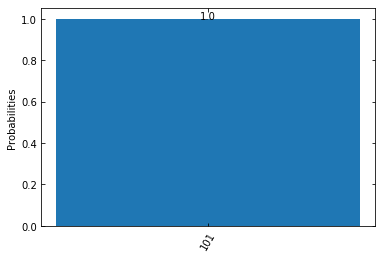

In [2]:
def bv_oracle(qci, x0, x1, x2, f_x):
    qci.cx(x0, f_x)
    qci.cx(x2, f_x)
    
bn = 4
cn = 3
q = QuantumRegister(bn)
c = ClassicalRegister(cn)
qc = QuantumCircuit(q, c)

qc.x(q[3])
for i in range(bn):
    qc.h(q[i])

bv_oracle(qc, q[0], q[1], q[2], q[3])

for i in range(bn):
    qc.h(q[i])
 
for i in range(cn):
    qc.measure(q[i], c[i])
    
r = execute(qc)
print(r)
plot_histogram(r)

## Example2: $a=111$

{'111': 1024}


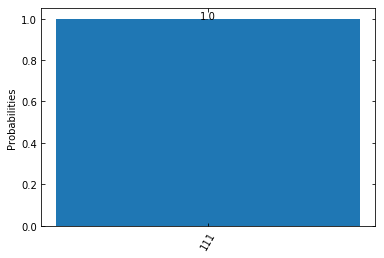

In [3]:
def bv_oracle(qci, x0, x1, x2, f_x):
    qci.cx(x0, f_x)
    qci.cx(x1, f_x)
    qci.cx(x2, f_x)
    
bn = 4
cn = 3
q = QuantumRegister(bn)
c = ClassicalRegister(cn)
qc = QuantumCircuit(q, c)

qc.x(q[3])
for i in range(bn):
    qc.h(q[i])

bv_oracle(qc, q[0], q[1], q[2], q[3])

for i in range(bn):
    qc.h(q[i])

for i in range(cn):
    qc.measure(q[i], c[i])
    
r = execute(qc)
print(r)
plot_histogram(r)